Combine historic data from dsm and future data from REMIND predictions

Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

Import historic and future data

In [3]:
# Define file paths for future and historic electrolyser data
future_path = Path.cwd().parent / "data" / "processed" / "electrolysers" / "future_electrolyser_capacity.csv"
historic_path = Path.cwd().parent / "data" / "processed" / "electrolysers" / "historic_electrolyser_capacity.csv"

# Load the future and historic electrolyser data
future_electrolyser_data = pd.read_csv(future_path)
historic_electrolyser_data = pd.read_csv(historic_path)

Characterize data

In [5]:
# Look at future data set
print("Future Electrolyser Data:")
print(future_electrolyser_data.head())

# Look at historic data set
print("\nHistoric Electrolyser Data:")
print(historic_electrolyser_data.head())

Future Electrolyser Data:
   Year      L-SSP2     M-SSP2        SSP1
0  2025    0.270754   0.270754    0.270754
1  2030    7.943682   6.051640   11.092192
2  2035   31.613359  23.711004   54.733323
3  2040   64.838293  53.896891  130.626293
4  2045  101.749253  91.434296  238.791953

Historic Electrolyser Data:
   Year  AEM  ALK  PEM  SOEC
0  1990  0.0  0.0  0.0   0.0
1  1991  0.0  0.0  0.0   0.0
2  1992  0.0  0.7  0.0   0.0
3  1993  0.0  0.0  0.0   0.0
4  1994  0.0  0.0  0.0   0.0


Sum historic data

In [14]:
# Sum historic data set to get total electrolyser capacity in Europe and put in new column "Capacity"
historic_data_total = historic_electrolyser_data.groupby("Year").sum().reset_index()

# Sum across all technology columns to get a single total column
tech_columns = [col for col in historic_data_total.columns if col != "Year"]
historic_data_total["total_capacity"] = historic_data_total[tech_columns].sum(axis=1)

# Keep only Year and the total column
historic_total = historic_data_total[["Year", "total_capacity"]]

# Convert total_capaity to GW from MW
historic_total["total_capacity"] = historic_total["total_capacity"] / 1000

# Check data set after summing
print("\nHistoric Electrolyser Data (Summed):")
print(historic_total.head())


Historic Electrolyser Data (Summed):
   Year  total_capacity
0  1990          0.0000
1  1991          0.0000
2  1992          0.0007
3  1993          0.0000
4  1994          0.0000


C:\Users\idapo\AppData\Local\Temp\ipykernel_18172\3503951804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_total["total_capacity"] = historic_total["total_capacity"] / 1000


Visualise combined data

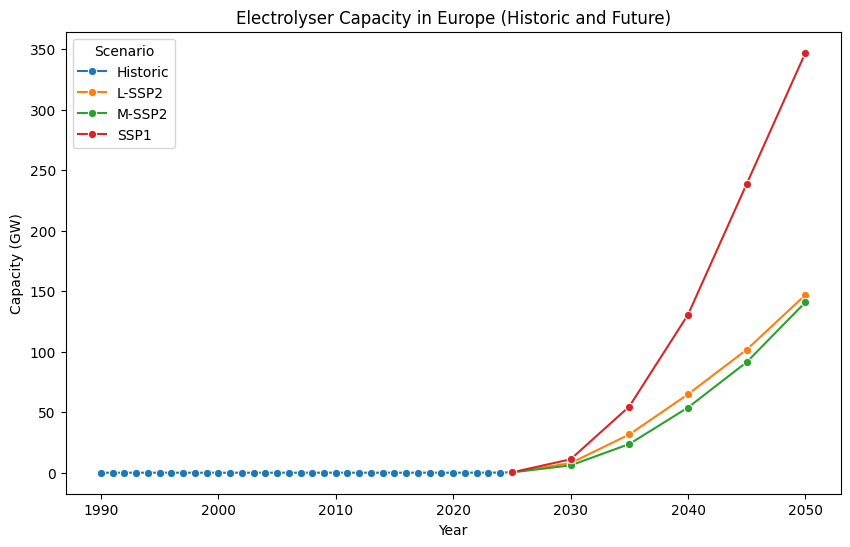

In [17]:
# Plot the historic and future electrolyser capacity in one plot

plt.figure(figsize=(10, 6))
sns.lineplot(data=historic_total, x="Year", y="total_capacity", marker="o", label="Historic")
sns.lineplot(data=future_electrolyser_data, x="Year", y="L-SSP2", marker="o", label="L-SSP2")
sns.lineplot(data=future_electrolyser_data, x="Year", y="M-SSP2", marker="o", label="M-SSP2")
sns.lineplot(data=future_electrolyser_data, x="Year", y="SSP1", marker="o", label="SSP1")
plt.title("Electrolyser Capacity in Europe (Historic and Future)")
plt.xlabel("Year")
plt.ylabel("Capacity (GW)")
plt.legend(title="Scenario")
plt.show()